In [16]:
import pandas as pd
import pickle
import datetime as dt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [17]:
#from LogIn import LogIn
#kite = LogIn().return_kite_obj()

In [18]:
budget_df = pd.read_csv('budget_new.csv')

In [19]:
budget_df = budget_df[budget_df['instrument']!='NSE:MRF']

In [20]:
budget_df['return'] = 0.05

In [21]:
budget_df['budget'] = 25000

In [22]:
budget_df

,instrument,budget,return
0,NSE:ACCELYA,25000,0.05
1,NSE:GOLDBEES,25000,0.05
2,NSE:GOLDSHARE,25000,0.05
3,NSE:NIFTYBEES,25000,0.05
4,NSE:POWERGRID,25000,0.05
5,NSE:WIPRO,25000,0.05
6,NSE:BIOCON,25000,0.05
7,NSE:COLPAL,25000,0.05
8,NSE:WABCOINDIA,25000,0.05
9,NSE:ASIANPAINT,25000,0.05


# Inputs

In [23]:
begin = "2015-02-01"
end = "2020-05-31"

In [24]:
leverage = 15
exit_time = dt.time(15, 10)

# Process

In [25]:
import datetime

# borrowed from https://stackoverflow.com/a/13565185
# as noted there, the calendar module has a function of its own
def last_day_of_month(any_day):
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)  # this will never fail
    return next_month - datetime.timedelta(days=next_month.day)

def monthlist(begin,end):
    begin = datetime.datetime.strptime(begin, "%Y-%m-%d")
    end = datetime.datetime.strptime(end, "%Y-%m-%d")

    result = []
    while True:
        if begin.month == 12:
            next_month = begin.replace(year=begin.year+1,month=1, day=1)
        else:
            next_month = begin.replace(month=begin.month+1, day=1)
        if next_month > end:
            break
        result.append ([begin.strftime("%Y-%m-%d"),last_day_of_month(begin).strftime("%Y-%m-%d")])
        begin = next_month
    result.append ([begin.strftime("%Y-%m-%d"),end.strftime("%Y-%m-%d")])
    return result


date_list = monthlist(begin,end)

In [26]:
def get_clean_data(instrument):
    
    print(instrument)

    all_data_df = pd.DataFrame()

    for time_range in date_list:
        print(time_range)

        from_date = time_range[0]
        to_date = time_range[1]

        data_df = pd.read_pickle('./data_new/{}_{}_{}.pkl'.format(instrument, from_date, to_date))

        data_df.rename(columns={'date':'timestamp'}, inplace=True)
        data_df['date'] = data_df['timestamp'].dt.date
        data_df['day'] = data_df['timestamp'].dt.day_name()
        print(len(data_df))

        sanity_check = data_df.groupby('date').count().reset_index()
        incomplete_data_days = sanity_check[sanity_check['volume']<300]
        print(len(incomplete_data_days))

        data_df = data_df[~data_df['date'].isin(incomplete_data_days.date.tolist())]
        data_df['instrument'] = instrument
        print(len(data_df)/375)

        all_data_df = all_data_df.append(data_df, ignore_index=True)

    return all_data_df

In [27]:
header_list = ['instrument', 'high_prev', 'low_prev', 'open_today', 'condition', 'transaction_type', 'trade_number', 'level', 'budget', 'return', 'daily_khwab', 'actual_khwab', 'quantity', 'budget_required', 'price', 'trigger_price', 'squareoff', 'stoploss', 'order_id', 'timestamp', 'order_type', 'status', 'profit', 'pl_tag', 'flag', 'adhoora_khwab']


In [28]:
calculate = True

if calculate:
    
    all_trades = pd.DataFrame(columns=header_list)

    for instrument in budget_df.instrument.tolist():

        try:
            all_data_df = get_clean_data(instrument)

            for i in range(len(all_data_df.date.unique().tolist())-1):

                date_prev = all_data_df.date.unique().tolist()[i]
                data_prev = all_data_df[all_data_df['date']==date_prev]
                open_prev = data_prev.open.iloc[0]
                close_prev = data_prev.open.iloc[-1]
                high_prev = data_prev.high.max()
                low_prev = data_prev.low.min()

                date_today = all_data_df.date.unique().tolist()[i+1]
                data_today = all_data_df[all_data_df['date']==date_today]

                # Trim beyond exit time
                data_today = data_today[data_today['timestamp'].dt.time<exit_time]
                open_today = data_today.open.iloc[0]

                if (open_today > high_prev) & (open_today < 1.15 * high_prev):

                    condition = 'high'
                    transaction_type = 'sell'

                elif (open_today < low_prev) & (open_today > 0.85 * low_prev):

                    condition = 'low'
                    transaction_type = 'buy'

                else:

                    condition = None
                    transaction_type = None

                if condition is not None:

                    valid_trades = all_trades[(all_trades['instrument']==instrument) & (all_trades['condition']==condition) & (all_trades['status']=='complete')]
                    last_valid_trade = valid_trades[valid_trades['trade_number']==valid_trades['trade_number'].max()]

                    # Calculate trade number
                    if len(last_valid_trade):
                        trade_number = int(last_valid_trade['trade_number']) + 1
                    else:
                        trade_number = 1
                    
                    # Calculate level
                    if len(last_valid_trade):
                        if float(last_valid_trade['pl_tag'])==1.0:
                            level = 1
                        else:
                            level = float(last_valid_trade['level']) + 1
                    else:
                        level = 1

                    # Calculate budget and return
                    if level==1:
                        budget = float(budget_df[budget_df['instrument']==instrument]['budget'])
                        return_ = float(budget_df[budget_df['instrument']==instrument]['return'])
                    else:
                        budget = float(last_valid_trade['budget'])
                        return_ = float(last_valid_trade['return'])

                    # Calculate daily khwab
                    if len(last_valid_trade):
                        if int(last_valid_trade['pl_tag'])==1:
                            daily_khwab = round(return_ * budget, 2)
                        else:
                            daily_khwab = 0
                    else:
                        daily_khwab = round(return_ * budget, 2)

                    # Calculate actual khwab
                    if len(last_valid_trade):
                        actual_khwab = max(round(float(last_valid_trade['adhoora_khwab']) + daily_khwab, 2), round(return_ * budget, 2))
                    else:
                        actual_khwab = round(return_ * budget, 2)

                    # Caluclate tax
                    if actual_khwab > 5 * (round(return_ * budget, 2)):
                        factor = 1.5
                    else:
                        factor = 3
                        
                    tax = factor * (0.0005647 * actual_khwab)/return_
                    actual_khwab = round(actual_khwab + tax, 2)
                    
                    # Calculate quantity
                    quantity = int(round(actual_khwab/(return_ * open_today)))

                    # Calculate budget required
                    budget_required = round(quantity * open_today, 2)

                    # Calculate price and trigger price
                    if transaction_type=='buy':
                        price = round(open_today + 0.05 * max(round(20 * 0.0010 * open_today), 2), 2)
                        trigger_price = round(open_today + 0.05 * max(round(20 * 0.0005 * open_today),1), 2)
                    else:
                        price = round(open_today - 0.05 * max(round(20 * 0.0010 * open_today), 2), 2)
                        trigger_price = round(open_today - 0.05 * max(round(20 * 0.0005 * open_today),1), 2)

                    # Calculate square off and stoploss
                    squareoff = round(return_ * price, 1)
                    stoploss = round(return_ * price, 1)

                    # Calculate order_id, order_type
                    order_id = trade_number
                    order_type = 'SL'

                    # Calculate timestamp, status and profit
                    if transaction_type=='buy':
                        
                        if data_today.high.max() < trigger_price:

                            timestamp = data_today.timestamp.iloc[0]
                            status = 'incomplete'
                            profit = 0

                        else:

                            status = 'complete'
                            for index, row in data_today.iterrows():

                                if row['high'] > price + squareoff:
                                    timestamp = row['timestamp']
                                    profit = round(squareoff * quantity, 2)
                                    break

                                elif row['low'] < price - stoploss:
                                    timestamp = row['timestamp']
                                    profit = round(-1 * stoploss * quantity, 2)
                                    break

                                else:
                                    timestamp = row['timestamp']
                                    profit = round((row['close']-price) * quantity, 2)

                    else:

                        if data_today.low.min() > trigger_price:
                            timestamp = data_today.timestamp.iloc[0]
                            status = 'incomplete'
                            profit = 0        

                        else:

                            status = 'complete'
                            for index, row in data_today.iterrows():

                                if row['low'] < price - squareoff:
                                    timestamp = row['timestamp']
                                    profit = round(squareoff * quantity, 2)
                                    break

                                elif row['high'] > price + stoploss:
                                    timestamp = row['timestamp']
                                    profit = round(-1 * stoploss * quantity, 2)
                                    break

                                else:
                                    timestamp = row['timestamp']
                                    profit = round((price - row['close']) * quantity, 2)

                    # Calculate P/L tag
                    pl_tag = round(round(float(profit), 2) / (float(squareoff) * float(quantity)), 1)

                    # Calculate flag
                    if abs(float(pl_tag))==1:
                        flag = 1
                    else:
                        flag = 0

                    # Calculate adhoora khwab
                    adhoora_khwab = round(float(actual_khwab) - profit, 2)

                    trades_today = pd.DataFrame(data={'instrument':[instrument], 
                                                      'high_prev':[high_prev], 
                                                      'low_prev':[low_prev], 
                                                      'open_today':[open_today], 
                                                      'condition':[condition], 
                                                      'transaction_type':[transaction_type], 
                                                      'trade_number':[trade_number], 
                                                      'level':[level], 
                                                      'budget':[budget], 
                                                      'return':[return_], 
                                                      'daily_khwab':[daily_khwab], 
                                                      'actual_khwab':[actual_khwab], 
                                                      'quantity':[quantity], 
                                                      'budget_required':[budget_required], 
                                                      'price':[price], 
                                                      'trigger_price':[trigger_price], 
                                                      'squareoff':[squareoff], 
                                                      'stoploss':[stoploss], 
                                                      'order_id':[order_id], 
                                                      'timestamp':[timestamp], 
                                                      'order_type':[order_type], 
                                                      'status':[status], 
                                                      'profit':[profit], 
                                                      'pl_tag':[pl_tag], 
                                                      'flag':[flag], 
                                                      'adhoora_khwab':[adhoora_khwab]
                                                     })

                    all_trades = all_trades.append(trades_today, ignore_index = True)
        except Exception as ex:
            print('Failed calculation for {} : {}'.format(instrument, ex))
            
    all_trades.to_pickle('all_trades_opp_brokerage_return_newdata_{}_{}.pkl'.format(begin, end))
    
else:
    
    all_trades = pd.read_pickle('all_trades_opp_brokerage_return_newdata_{}_{}.pkl'.format(begin, end))

NSE:ACCELYA
['2015-02-01', '2015-02-28']
7500
0
20.0
['2015-03-01', '2015-03-31']
7842
0
20.912
['2015-04-01', '2015-04-30']
7109
0
18.957333333333334
['2015-05-01', '2015-05-31']
7494
0
19.984
['2015-06-01', '2015-06-30']
8233
0
21.954666666666668
['2015-07-01', '2015-07-31']
8568
0
22.848
['2015-08-01', '2015-08-31']
7831
0
20.882666666666665
['2015-09-01', '2015-09-30']
7442
0
19.845333333333333
['2015-10-01', '2015-10-31']
7435
0
19.826666666666668
['2015-11-01', '2015-11-30']
6752
1
17.84
['2015-12-01', '2015-12-31']
7949
1
20.504
['2016-01-01', '2016-01-31']
7017
0
18.712
['2016-02-01', '2016-02-29']
7606
1
19.576
['2016-03-01', '2016-03-31']
7203
1
18.44
['2016-04-01', '2016-04-30']
6574
0
17.530666666666665
['2016-05-01', '2016-05-31']
8196
0
21.856
['2016-06-01', '2016-06-30']
8105
0
21.613333333333333
['2016-07-01', '2016-07-31']
7397
0
19.72533333333333
['2016-08-01', '2016-08-31']
8017
0
21.378666666666668
['2016-09-01', '2016-09-30']
7459
0
19.890666666666668
['2016-10-01'

['2018-01-01', '2018-01-31']
8141
0
21.709333333333333
['2018-02-01', '2018-02-28']
6790
0
18.106666666666666
['2018-03-01', '2018-03-31']
6995
0
18.653333333333332
['2018-04-01', '2018-04-30']
7772
0
20.72533333333333
['2018-05-01', '2018-05-31']
8093
0
21.581333333333333
['2018-06-01', '2018-06-30']
7684
0
20.490666666666666
['2018-07-01', '2018-07-31']
8165
0
21.773333333333333
['2018-08-01', '2018-08-31']
7795
0
20.786666666666665
['2018-09-01', '2018-09-30']
6539
0
17.437333333333335
['2018-10-01', '2018-10-31']
7730
0
20.613333333333333
['2018-11-01', '2018-11-30']
7113
1
18.808
['2018-12-01', '2018-12-31']
5830
9
10.808
['2019-01-01', '2019-01-31']
4919
20
3.0
['2019-02-01', '2019-02-28']
3823
20
0.0
['2019-03-01', '2019-03-31']
3229
19
0.0
['2019-04-01', '2019-04-30']
2853
19
0.0
['2019-05-01', '2019-05-31']
3642
21
0.8826666666666667
['2019-06-01', '2019-06-30']
3948
19
0.0
['2019-07-01', '2019-07-31']
4291
23
0.0
['2019-08-01', '2019-08-31']
5198
19
0.8213333333333334
['2019-

0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04

0
21.96
['2017-01-01', '2017-01-31']
7839
0
20.904
['2017-02-01', '2017-02-28']
7099
0
18.930666666666667
['2017-03-01', '2017-03-31']
8222
0
21.925333333333334
['2017-04-01', '2017-04-30']
6739
0
17.970666666666666
['2017-05-01', '2017-05-31']
8224
0
21.930666666666667
['2017-06-01', '2017-06-30']
7841
0
20.909333333333333
['2017-07-01', '2017-07-31']
7655
1
19.933333333333334
['2017-08-01', '2017-08-31']
7824
0
20.864
['2017-09-01', '2017-09-30']
7853
0
20.941333333333333
['2017-10-01', '2017-10-31']
7154
1
18.92
['2017-11-01', '2017-11-30']
8235
0
21.96
['2017-12-01', '2017-12-31']
7442
0
19.845333333333333
['2018-01-01', '2018-01-31']
8237
0
21.965333333333334
['2018-02-01', '2018-02-28']
7115
0
18.973333333333333
['2018-03-01', '2018-03-31']
7087
0
18.898666666666667
['2018-04-01', '2018-04-30']
7845
0
20.92
['2018-05-01', '2018-05-31']
8201
0
21.869333333333334
['2018-06-01', '2018-06-30']
7848
0
20.928
['2018-07-01', '2018-07-31']
8224
0
21.930666666666667
['2018-08-01', '2018-0

['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '

0
20.0
['2015-11-01', '2015-11-30']
6812
1
18.0
['2015-12-01', '2015-12-31']
8232
0
21.952
['2016-01-01', '2016-01-31']
7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-

['2020-03-01', '2020-03-31']
5528
20
0.808
['2020-04-01', '2020-04-30']
4278
18
0.0
['2020-05-01', '2020-05-31']
2696
15
0.0
NSE:NPBET
['2015-02-01', '2015-02-28']
Failed calculation for NSE:NPBET : 'timestamp'
NSE:TORNTPHARM
['2015-02-01', '2015-02-28']
7500
0
20.0
['2015-03-01', '2015-03-31']
7841
0
20.909333333333333
['2015-04-01', '2015-04-30']
7121
0
18.989333333333335
['2015-05-01', '2015-05-31']
7500
0
20.0
['2015-06-01', '2015-06-30']
8250
0
22.0
['2015-07-01', '2015-07-31']
8621
0
22.989333333333335
['2015-08-01', '2015-08-31']
7871
0
20.989333333333335
['2015-09-01', '2015-09-30']
7483
0
19.954666666666668
['2015-10-01', '2015-10-31']
7500
0
20.0
['2015-11-01', '2015-11-30']
6812
1
18.0
['2015-12-01', '2015-12-31']
8227
0
21.938666666666666
['2016-01-01', '2016-01-31']
7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250


['2019-02-01', '2019-02-28']
7491
0
19.976
['2019-03-01', '2019-03-31']
7120
0
18.986666666666668
['2019-04-01', '2019-04-30']
7120
0
18.986666666666668
['2019-05-01', '2019-05-31']
8247
0
21.992
['2019-06-01', '2019-06-30']
7107
0
18.952
['2019-07-01', '2019-07-31']
8606
0
22.949333333333332
['2019-08-01', '2019-08-31']
7479
0
19.944
['2019-09-01', '2019-09-30']
7102
0
18.938666666666666
['2019-10-01', '2019-10-31']
7178
1
18.981333333333332
['2019-11-01', '2019-11-30']
7497
0
19.992
['2019-12-01', '2019-12-31']
7875
0
21.0
['2020-01-01', '2020-01-31']
8625
0
23.0
['2020-02-01', '2020-02-29']
7499
0
19.997333333333334
['2020-03-01', '2020-03-31']
7757
0
20.685333333333332
['2020-04-01', '2020-04-30']
6750
0
18.0
['2020-05-01', '2020-05-31']
5625
0
15.0
NSE:BATAINDIA
['2015-02-01', '2015-02-28']
7500
0
20.0
['2015-03-01', '2015-03-31']
7842
0
20.912
['2015-04-01', '2015-04-30']
7121
0
18.989333333333335
['2015-05-01', '2015-05-31']
7500
0
20.0
['2015-06-01', '2015-06-30']
8250
0
22.0
[

['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04-01', '2019-04-30']
7125
0
19.0
['2019-05-01', '2019-05-31']
8247
0
21.992
['2019-06-01', '2019-06-30']
7125
0
19.0
['2019-07-01', '2019-07-31']
8625
0
23.0
['2019-08-01', '2019-08-31']
7499
0
19.997333333333334
['2019-09-01', '2019-09-30']
7110
0
18.96
['2019-10-01', '2019-10-31']
7185
1
19.0
['2019-11-01', '2019-11-30']
7500
0
20.0
['2019-12-01', '2019-12-31']
7875
0
21.0
['2020-01-01', '2020-01-31']
8625
0
23.0
['2020-02-01', '2020-02-29']
7499
0
19.997333333333334
['2020-03-01', '2020-03-31']
7757
0
20.685333333333332
['2020-04-01', '2020-04-30']
6751
0
18.002666666666666
['2020-05-01', '2020-05-31']
5625
0
15.0
NSE:MCDOWELL-N
['2015-02-01', '2015-02-28']
7500
0
20.0
['2015-03-01', '2015-03-31']
7842
0
20.912
['2015-04-01', '2015-04-30']
7121
0
18.989333333333335
['2015-05-01', '2015-05-31']
7500
0
20.0
['2015-0

['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04-01', '2019-04-30']
7125
0
19.0
['2019-05-01', '2019-05-31']
8247
0
21.992
['2019-06-01', '2019-06-30']
7125
0
19.0
['2019-07-01', '2019-07-31']
8625
0
23.0
['2019-08-01', '2019-08-31']
7499
0
19.997333333333334
['2019-09-01', '2019-09-30']
7110
0
18.96
['2019-10-01', '2019-10-31']
7185
1
19.0
['2019-11-01', '2019-11-30']
7500
0
20.0
['2019-12-01', '2019-12-31']
7875
0
21.0
['2020-01-01', '2020-01-31']
8625
0
23.0
['2020-02-01', '2020-02-29']
7499
0
19.997333333333334
['2020-03-01', '2020-03-31

7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04-01', '2019-04-30']
7125
0
19.0
['2019-05-01', '2019-05-31']
8250
0
22.0
['2019-06-01', '2019-06-30']
7125
0
19.0
['2019-07-01', '2019-07-31']
8625
0
23.0
['2019-08-01', '2019-08-31']
7499
0
19.997333333333334
['2019-09-01', '2019-09-30']
7110
0
18.96
['2019-10-01', '2019-10-31']
7185
1
19.0
['2019-11-01', '2019-11-30']
7500
0
20.0
['2019-12-01', '2019-12-31']
7875
0
21.0
['2020-01-01', '2020-01-31']
8625
0
23.0
['2020-02-01', '2020-02-29']
7499
0
19.997333333333334
['2020-03-01', '2020-03-31']
7757
0
20.685333333333332
['

0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04-01', '2019-04-30']
7125
0
19.0
['2019-05-01', '2019-05-31']
8247
0
21.992
['2019-06-01', '2019-06-30']
7125
0
19.0
['2019-07-01', '2019-07-31']
8625
0
23.0
['2019-08-01', '2019-08-31']
7499
0
19.997333333333334
['2019-09-01', '2019-09-30']
7110
0
18.96
['2019-10-01', '2019-10-31']
7185
1
19.0
['2019-11-01', '2019-11-30']
7500
0
20.0
['2019-12-01', '2019-12-31']
7875
0
21.0
['2020-01-01', '2020-01-31']
8625

0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04-01', '2019-04-30']
7125
0
19.0
['2019-05

0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07

7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['20

0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02

0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03

['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '

7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['20

['2016-03-01', '2016-03-31']
7491
0
19.976
['2016-04-01', '2016-04-30']
6746
0
17.989333333333335
['2016-05-01', '2016-05-31']
8225
0
21.933333333333334
['2016-06-01', '2016-06-30']
8239
0
21.970666666666666
['2016-07-01', '2016-07-31']
7480
0
19.946666666666665
['2016-08-01', '2016-08-31']
8236
0
21.962666666666667
['2016-09-01', '2016-09-30']
7482
0
19.952
['2016-10-01', '2016-10-31']
6799
1
17.973333333333333
['2016-11-01', '2016-11-30']
7857
0
20.952
['2016-12-01', '2016-12-31']
8226
0
21.936
['2017-01-01', '2017-01-31']
7858
0
20.954666666666668
['2017-02-01', '2017-02-28']
7106
0
18.949333333333332
['2017-03-01', '2017-03-31']
8223
0
21.928
['2017-04-01', '2017-04-30']
6721
0
17.922666666666668
['2017-05-01', '2017-05-31']
8221
0
21.922666666666668
['2017-06-01', '2017-06-30']
7872
0
20.992
['2017-07-01', '2017-07-31']
7670
1
19.973333333333333
['2017-08-01', '2017-08-31']
7862
0
20.965333333333334
['2017-09-01', '2017-09-30']
7871
0
20.989333333333335
['2017-10-01', '2017-10-31'

['2015-07-01', '2015-07-31']
8621
0
22.989333333333335
['2015-08-01', '2015-08-31']
7872
0
20.992
['2015-09-01', '2015-09-30']
7481
0
19.949333333333332
['2015-10-01', '2015-10-31']
7500
0
20.0
['2015-11-01', '2015-11-30']
6812
1
18.0
['2015-12-01', '2015-12-31']
8227
0
21.938666666666666
['2016-01-01', '2016-01-31']
7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01'

['2015-08-01', '2015-08-31']
7870
0
20.986666666666668
['2015-09-01', '2015-09-30']
7486
0
19.962666666666667
['2015-10-01', '2015-10-31']
7500
0
20.0
['2015-11-01', '2015-11-30']
6812
1
18.0
['2015-12-01', '2015-12-31']
8232
0
21.952
['2016-01-01', '2016-01-31']
7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31'

['2015-08-01', '2015-08-31']
7872
0
20.992
['2015-09-01', '2015-09-30']
7481
0
19.949333333333332
['2015-10-01', '2015-10-31']
7500
0
20.0
['2015-11-01', '2015-11-30']
6812
1
18.0
['2015-12-01', '2015-12-31']
8232
0
21.952
['2016-01-01', '2016-01-31']
7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.

['2015-09-01', '2015-09-30']
7480
0
19.946666666666665
['2015-10-01', '2015-10-31']
7500
0
20.0
['2015-11-01', '2015-11-30']
6812
1
18.0
['2015-12-01', '2015-12-31']
8226
0
21.936
['2016-01-01', '2016-01-31']
7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0


0
20.989333333333335
['2015-09-01', '2015-09-30']
7486
0
19.962666666666667
['2015-10-01', '2015-10-31']
7500
0
20.0
['2015-11-01', '2015-11-30']
6812
1
18.0
['2015-12-01', '2015-12-31']
8227
0
21.938666666666666
['2016-01-01', '2016-01-31']
7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-0

0
20.986666666666668
['2015-09-01', '2015-09-30']
7483
0
19.954666666666668
['2015-10-01', '2015-10-31']
7500
0
20.0
['2015-11-01', '2015-11-30']
6812
1
18.0
['2015-12-01', '2015-12-31']
8226
0
21.936
['2016-01-01', '2016-01-31']
7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017

['2015-08-01', '2015-08-31']
7870
0
20.986666666666668
['2015-09-01', '2015-09-30']
7483
0
19.954666666666668
['2015-10-01', '2015-10-31']
7500
0
20.0
['2015-11-01', '2015-11-30']
6812
1
18.0
['2015-12-01', '2015-12-31']
8226
0
21.936
['2016-01-01', '2016-01-31']
7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31'

0
22.989333333333335
['2015-08-01', '2015-08-31']
7871
0
20.989333333333335
['2015-09-01', '2015-09-30']
7484
0
19.957333333333334
['2015-10-01', '2015-10-31']
7500
0
20.0
['2015-11-01', '2015-11-30']
6812
1
18.0
['2015-12-01', '2015-12-31']
8227
0
21.938666666666666
['2016-01-01', '2016-01-31']
7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0

['2015-08-01', '2015-08-31']
7870
0
20.986666666666668
['2015-09-01', '2015-09-30']
7483
0
19.954666666666668
['2015-10-01', '2015-10-31']
7500
0
20.0
['2015-11-01', '2015-11-30']
6812
1
18.0
['2015-12-01', '2015-12-31']
8232
0
21.952
['2016-01-01', '2016-01-31']
7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31'

# High Trades Analysis

In [57]:
all_trades['new_timestamp'] = all_trades.apply(lambda s: s['timestamp'].tz_convert(None), axis=1)

In [101]:
all_trades[~all_trades['instrument'].isin(less_100)].instrument.nunique()

63

In [58]:
high_trades = all_trades[(all_trades['condition']=='high') & (all_trades['status']=='complete') & (~all_trades['instrument'].isin(less_100)) & (all_trades['new_timestamp']<pd.to_datetime('2019-12-31'))]


In [59]:
high_trades_loop = pd.DataFrame()
for instrument in high_trades.instrument.unique().tolist():
    instrument_high_trades = high_trades[high_trades['instrument']==instrument]
    instrument_high_trades_loop = instrument_high_trades[instrument_high_trades['trade_number']<=instrument_high_trades[instrument_high_trades['pl_tag']==1.0].trade_number.max()]
    high_trades_loop = high_trades_loop.append(instrument_high_trades_loop, ignore_index=True)
    

In [60]:
high_trades.head()

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab,date,margin_required,new_timestamp
1227,NSE:POWERGRID,148.85,145.00,149.30,high,sell,1,1,25000.0,0.05,1250.0,1292.35,173,25828.90,149.15,149.25,7.5,7.5,1,2015-02-12 15:09:00+05:30,SL,complete,0.00,0.0,0,1292.35,2015-02-12,1721.926667,2015-02-12 09:39:00
1228,NSE:POWERGRID,157.50,152.15,158.35,high,sell,2,2,25000.0,0.05,0.0,1336.14,169,26761.15,158.20,158.25,7.9,7.9,2,2015-02-28 15:09:00+05:30,SL,complete,245.05,0.2,0,1091.09,2015-02-28,1784.076667,2015-02-28 09:39:00
1229,NSE:POWERGRID,156.35,154.15,156.45,high,sell,3,3,25000.0,0.05,0.0,1292.35,165,25814.25,156.30,156.35,7.8,7.8,3,2015-03-04 15:09:00+05:30,SL,complete,404.25,0.3,0,888.10,2015-03-04,1720.950000,2015-03-04 09:39:00
1230,NSE:POWERGRID,151.60,147.40,151.70,high,sell,4,4,25000.0,0.05,0.0,1292.35,170,25789.00,151.55,151.60,7.6,7.6,4,2015-04-10 15:09:00+05:30,SL,complete,-195.50,-0.2,0,1487.85,2015-04-10,1719.266667,2015-04-10 09:39:00
1231,NSE:POWERGRID,141.05,138.15,141.80,high,sell,5,5,25000.0,0.05,0.0,1538.26,217,30770.60,141.65,141.75,7.1,7.1,5,2015-05-08 15:09:00+05:30,SL,complete,347.20,0.2,0,1191.06,2015-05-08,2051.373333,2015-05-08 09:39:00


In [61]:
high_trades.instrument.nunique()

63

In [62]:
high_trades.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ACC,13820.55,481323.45
1,NSE:AMARAJABAT,26617.55,79321.75
2,NSE:AMBUJACEM,12036.70,210056.40
3,NSE:ASIANPAINT,12710.40,180458.85
4,NSE:AUROPHARMA,26535.43,198055.50
5,NSE:BAJAJ-AUTO,12391.00,72078.60
6,NSE:BATAINDIA,20602.46,242875.45
7,NSE:BERGEPAINT,17829.24,104742.70
8,NSE:BHARTIARTL,14714.15,154462.00
9,NSE:BOSCHLTD,20789.20,65850.00


In [63]:
high_trades_loop.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ACC,16125.00,481323.45
1,NSE:AMARAJABAT,26501.75,79321.75
2,NSE:AUROPHARMA,21855.58,81095.85
3,NSE:BAJAJ-AUTO,12770.70,53340.00
4,NSE:BATAINDIA,8142.16,60588.00
5,NSE:BERGEPAINT,9096.84,104742.70
6,NSE:BHARTIARTL,6253.35,154462.00
7,NSE:BOSCHLTD,18303.35,65850.00
8,NSE:BRITANNIA,3138.23,92384.10
9,NSE:CADILAHC,11580.54,231045.00


# Low Trades Analysis

In [66]:
low_trades = all_trades[(all_trades['condition']=='low') & (all_trades['status']=='complete') & (~all_trades['instrument'].isin(less_100)) & (all_trades['new_timestamp']<pd.to_datetime('2019-12-31'))]

In [67]:
low_trades_loop = pd.DataFrame()
for instrument in low_trades.instrument.unique().tolist():
    instrument_low_trades = low_trades[low_trades['instrument']==instrument]
    instrument_low_trades_loop = instrument_low_trades[instrument_low_trades['trade_number']<=instrument_low_trades[instrument_low_trades['pl_tag']==1.0].trade_number.max()]
    low_trades_loop = low_trades_loop.append(instrument_low_trades_loop, ignore_index=True)
    

In [68]:
low_trades.head()

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab,date,margin_required,new_timestamp
1226,NSE:POWERGRID,146.90,143.00,142.45,low,buy,1,1,25000.0,0.05,1250.0,1292.35,181,25783.45,142.60,142.50,7.1,7.1,1,2015-02-06 15:09:00+05:30,SL,complete,27.15,0.0,0,1265.20,2015-02-06,1718.896667,2015-02-06 09:39:00
1235,NSE:POWERGRID,141.25,138.90,138.00,low,buy,2,2,25000.0,0.05,0.0,1308.07,190,26220.00,138.15,138.05,6.9,6.9,2,2015-06-29 15:09:00+05:30,SL,complete,247.00,0.2,0,1061.07,2015-06-29,1748.000000,2015-06-29 09:39:00
1236,NSE:POWERGRID,142.95,140.60,140.50,low,buy,3,3,25000.0,0.05,0.0,1292.35,184,25852.00,140.65,140.55,7.0,7.0,3,2015-07-06 15:09:00+05:30,SL,complete,-64.40,-0.1,0,1356.75,2015-07-06,1723.466667,2015-07-06 09:39:00
1237,NSE:POWERGRID,141.50,138.25,138.10,low,buy,4,4,25000.0,0.05,0.0,1402.72,203,28034.30,138.25,138.15,6.9,6.9,4,2015-07-08 15:09:00+05:30,SL,complete,30.45,0.0,0,1372.27,2015-07-08,1868.953333,2015-07-08 09:39:00
1238,NSE:POWERGRID,138.40,136.10,135.10,low,buy,5,5,25000.0,0.05,0.0,1418.77,210,28371.00,135.25,135.15,6.8,6.8,5,2015-08-20 15:09:00+05:30,SL,complete,94.50,0.1,0,1324.27,2015-08-20,1891.400000,2015-08-20 09:39:00


In [69]:
low_trades.instrument.nunique()

63

In [71]:
low_trades.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ACC,6843.05,66359.30
1,NSE:AMARAJABAT,14455.95,69264.50
2,NSE:AMBUJACEM,13296.60,225241.25
3,NSE:ASIANPAINT,6197.95,110384.40
4,NSE:AUROPHARMA,12822.48,97399.60
5,NSE:BAJAJ-AUTO,7603.30,97328.00
6,NSE:BATAINDIA,12013.01,99792.00
7,NSE:BERGEPAINT,9266.72,185144.40
8,NSE:BHARTIARTL,14090.00,123165.00
9,NSE:BOSCHLTD,7262.65,156776.00


In [72]:
low_trades_loop.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:AMARAJABAT,11949.30,69264.50
1,NSE:AMBUJACEM,12273.40,225241.25
2,NSE:ASIANPAINT,5139.25,69071.20
3,NSE:AUROPHARMA,8612.33,74895.60
4,NSE:BATAINDIA,12063.91,99792.00
5,NSE:BERGEPAINT,2977.11,55633.41
6,NSE:BHARTIARTL,13546.60,123165.00
7,NSE:BOSCHLTD,5140.00,128706.00
8,NSE:CADILAHC,17503.57,105126.20
9,NSE:CESC,10108.90,146300.00


# Results

In [73]:
pd.DataFrame(data={'high':[len(high_trades),
                           len(high_trades_loop),
                           round(high_trades_loop.profit.sum(), 2), 
                           round(high_trades_loop.profit.sum()/budget_df.budget.sum() * 100, 2),
                           round(high_trades_loop.budget_required.max()), 
                           round(high_trades_loop.budget_required.max()/leverage)],
                   'low':[len(low_trades),
                          len(low_trades_loop),
                          round(low_trades_loop.profit.sum(), 2), 
                          round(low_trades_loop.profit.sum()/budget_df.budget.sum() * 100, 2),
                          round(low_trades_loop.budget_required.max()),
                          round(low_trades_loop.budget_required.max()/leverage)]
                   }, 
             index = ['total_trades', 'trades_considered', 'profit', 'perc_return', 'hightest_budget_required', 'hightest_margin_required'])

,high,low
total_trades,6936.00,3973.00
trades_considered,4017.00,2377.00
profit,769091.69,571645.89
perc_return,34.18,25.41
hightest_budget_required,838980.00,822160.00
hightest_margin_required,55932.00,54811.00


In [74]:
pd.DataFrame(data={'high':[len(high_trades),
                           len(high_trades),
                           round(high_trades.profit.sum(), 2), 
                           round(high_trades.profit.sum()/budget_df.budget.sum() * 100, 2),
                           round(high_trades.budget_required.max()), 
                           round(high_trades.budget_required.max()/leverage)],
                   'low':[len(low_trades),
                          len(low_trades),
                          round(low_trades.profit.sum(), 2), 
                          round(low_trades.profit.sum()/budget_df.budget.sum() * 100, 2),
                          round(low_trades.budget_required.max()),
                          round(low_trades.budget_required.max()/leverage)]
                   }, 
             index = ['total_trades', 'trades_considered', 'profit', 'perc_return', 'hightest_budget_required', 'hightest_margin_required'])

,high,low
total_trades,6936.00,3973.00
trades_considered,6936.00,3973.00
profit,1126076.08,737626.09
perc_return,50.05,32.78
hightest_budget_required,1052941.00,822160.00
hightest_margin_required,70196.00,54811.00


# Daily Margin Required Analysis

In [44]:
all_trades['date'] = all_trades['timestamp'].dt.date
all_trades['margin_required'] = all_trades['budget_required']/leverage
margins = all_trades.groupby('date').agg({'budget_required':sum, 'margin_required':sum, 'instrument':list}).reset_index()

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def stacked_bar(data, series_labels, category_labels=None, 
                show_values=False, value_format="{}", y_label=None, 
                grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i]))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels, rotation='vertical')

    if y_label:
        plt.ylabel(y_label)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

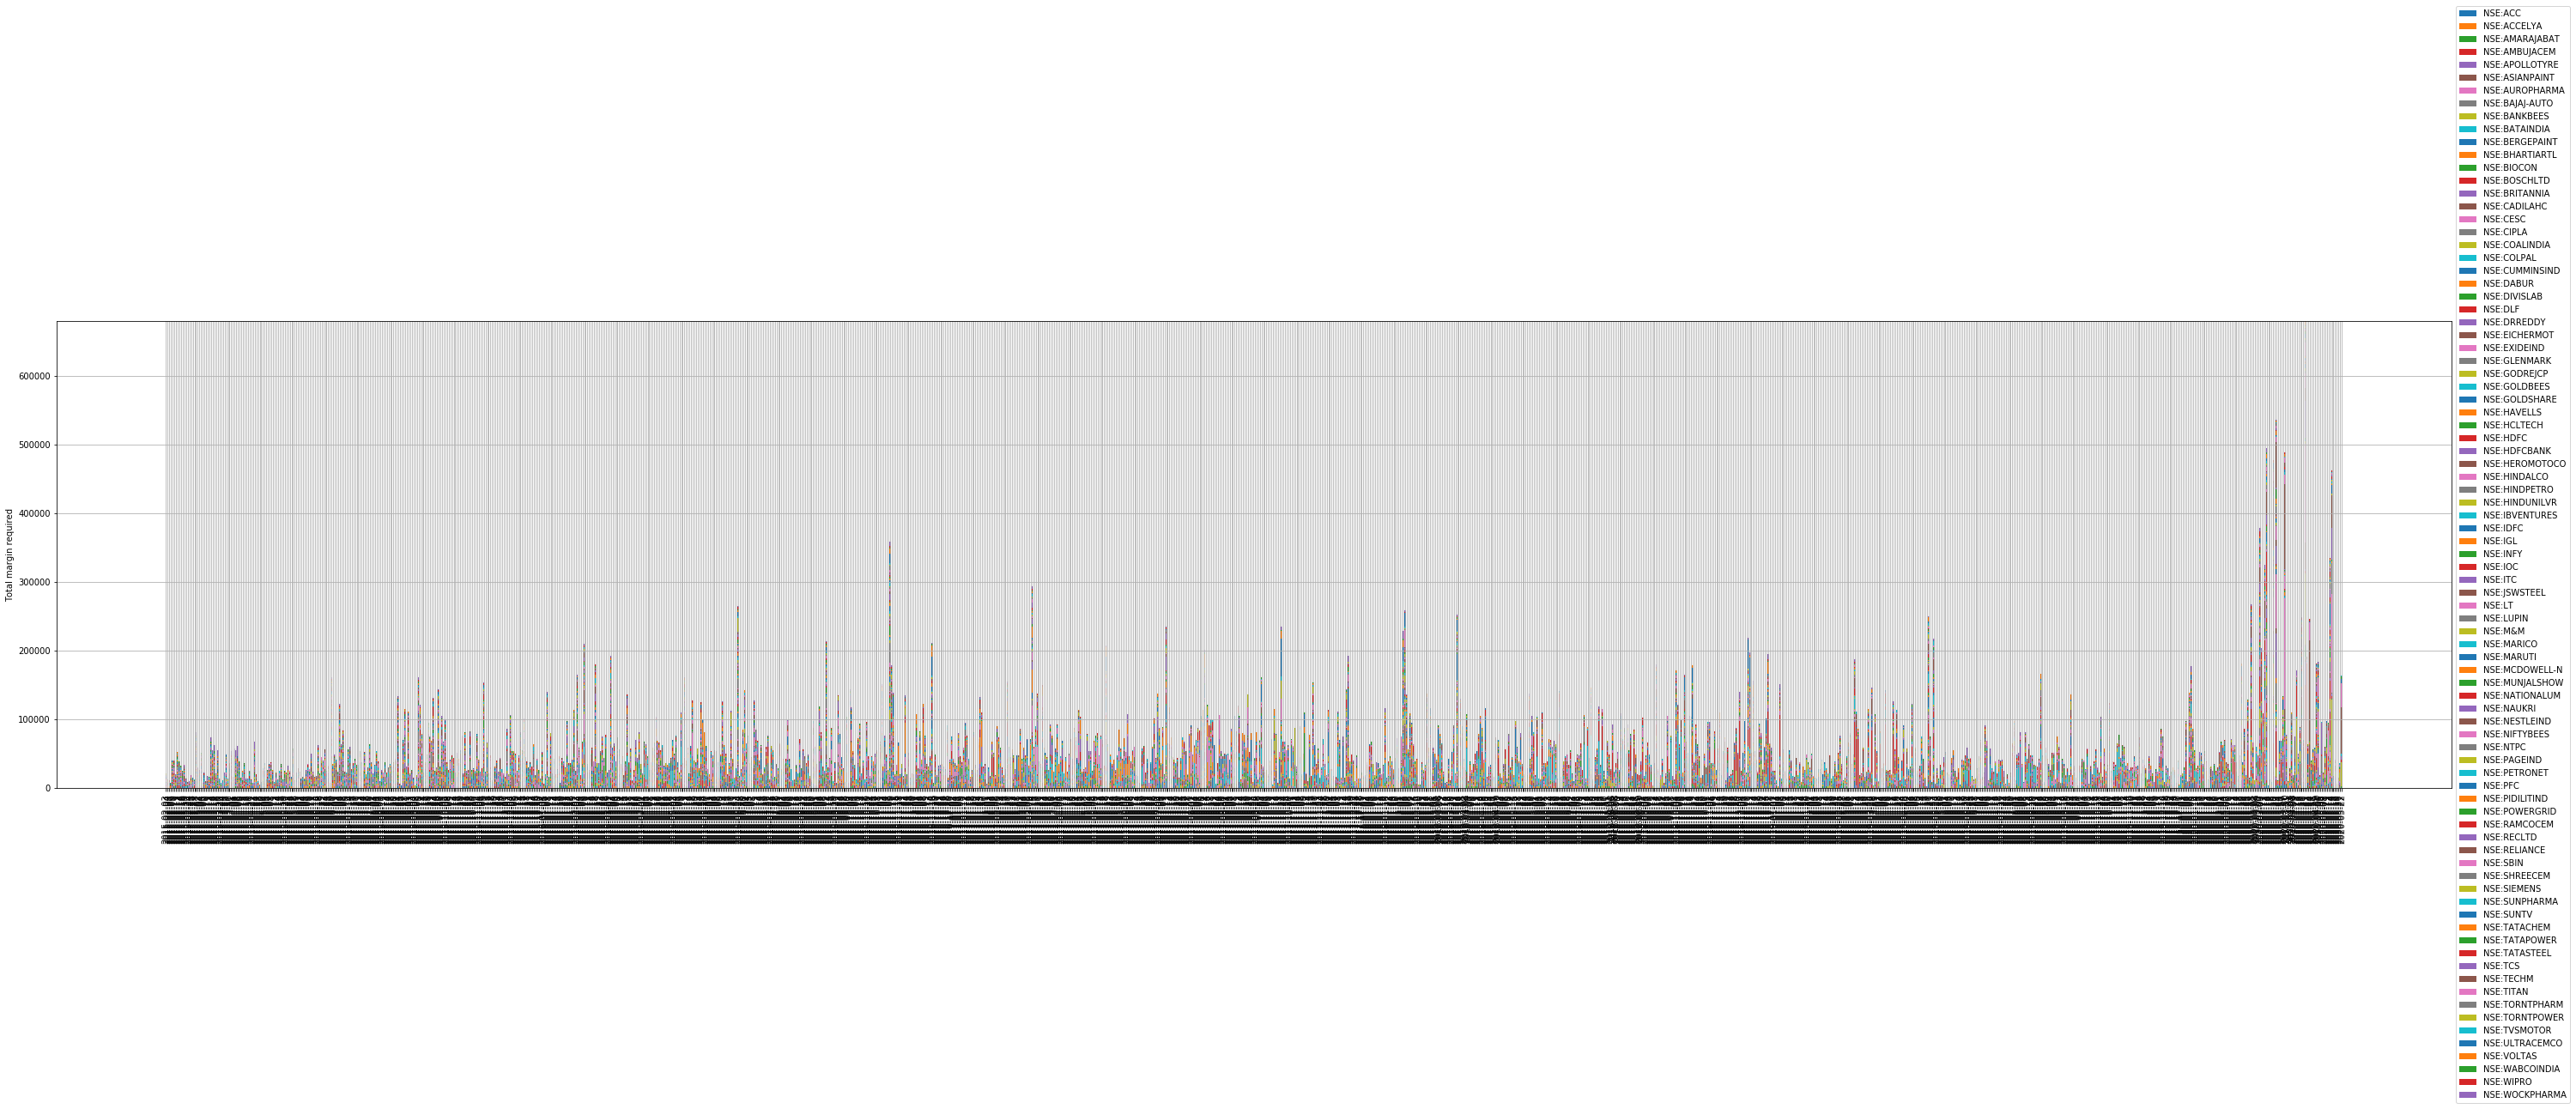

In [46]:
df2 = all_trades.groupby(['date', 'instrument'])['margin_required'].sum().unstack('instrument').fillna(0)

df2['date'] = df2[df2['date'] < '2019/12/31']
df = df2.transpose()

plt.figure(figsize=(50, 10))

series_labels = df.index.tolist()

data = df.values

category_labels = df.columns.tolist()

stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=False,
    value_format="{:.1f}",
    y_label="Total margin required"
)

plt.savefig('margin_required_opp_brokerage_return_newdata_{}_{}.png'.format(begin, end))
plt.show()

## Brokerage Calculation

In [ ]:
# brokerage = min(40, 0.0002 * budget_required)
# stt = 0.00025 * budget_required
# transaction_charges = 2 * 0.0000325 * budget_required
# gst = 0.18 * (brokerage + transaction_charges)
# sebi = 2 * 10 * budget_required/10000000
# total_tax_and_charges = brokerage + stt + transaction_charges + gst + sebi

# profit = profit - total_tax_and_charges

# Postmartem

In [29]:
less_100 = all_trades[all_trades['low_prev']<100].instrument.unique().tolist()

In [102]:
len(less_100)

22

In [103]:
all_trades[~all_trades['instrument'].isin(less_100)].instrument.nunique()

63

In [104]:
all_trades.instrument.nunique()

85

In [105]:
set(budget_df.instrument.unique().tolist())-set(all_trades.instrument.unique().tolist())

{'NSE:ICICIBANKN', 'NSE:LICNFNHGP', 'NSE:LINCOLN', 'NSE:MGL', 'NSE:NPBET'}

In [106]:
budget_df

,instrument,budget,return
0,NSE:ACCELYA,25000,0.05
1,NSE:GOLDBEES,25000,0.05
2,NSE:GOLDSHARE,25000,0.05
3,NSE:NIFTYBEES,25000,0.05
4,NSE:POWERGRID,25000,0.05
5,NSE:WIPRO,25000,0.05
6,NSE:BIOCON,25000,0.05
7,NSE:COLPAL,25000,0.05
8,NSE:WABCOINDIA,25000,0.05
9,NSE:ASIANPAINT,25000,0.05


In [114]:
new_budget = budget_df[~budget_df.instrument.isin(less_100)]

In [115]:
len(new_budget)

68

In [118]:
new_budget

,instrument,budget,return
4,NSE:POWERGRID,25000,0.05
5,NSE:WIPRO,25000,0.05
7,NSE:COLPAL,25000,0.05
9,NSE:ASIANPAINT,25000,0.05
10,NSE:DABUR,25000,0.05
11,NSE:HINDUNILVR,25000,0.05
12,NSE:NESTLEIND,25000,0.05
13,NSE:ICICIBANKN,25000,0.05
15,NSE:INFY,25000,0.05
16,NSE:LICNFNHGP,25000,0.05


In [119]:
new_budget.to_csv('budget.csv', index=False)

In [107]:
ohlc = pd.read_csv('ohlc.csv')

In [108]:
ohlc

,instrument,instrument_token,last_price_prev,open_prev,high_prev,low_prev,close_prev
0,NSE:ACC,5633,1227.10,1172.00,1240.00,1161.60,1187.60
1,NSE:ACCELYA,1805569,914.45,912.05,919.90,907.35,914.90
2,NSE:AMARAJABAT,25601,592.55,600.00,613.50,586.90,596.40
3,NSE:APOLLOTYRE,41729,90.35,91.50,93.00,89.85,91.85
4,NSE:ASIANPAINT,60417,1617.90,1568.80,1625.00,1555.40,1574.30
5,NSE:BAJAJ-AUTO,4267265,2553.75,2623.00,2634.50,2542.80,2640.35
6,NSE:BANKBEES,2928385,173.76,176.75,180.00,172.50,178.27
7,NSE:BATAINDIA,94977,1274.70,1295.00,1322.00,1267.35,1301.30
8,NSE:BERGEPAINT,103425,457.30,463.60,473.50,453.00,465.45
9,NSE:BIOCON,2911489,350.30,355.00,356.85,347.60,354.85


In [99]:
low_trades[low_trades['budget_required']==low_trades['budget_required'].max()]

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab,date,margin_required,new_timestamp
16685,NSE:ULTRACEMCO,4185.9,4051.2,4050.05,low,buy,36,36,25000.0,0.05,0.0,41066.4,203,822160.15,4054.1,4052.1,202.7,202.7,36,2017-10-23 15:09:00+05:30,SL,complete,29404.55,0.7,0,11661.85,2017-10-23,54810.676667,2017-10-23 09:39:00


In [100]:
low_trades[low_trades['instrument']=='NSE:ULTRACEMCO']

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab,date,margin_required,new_timestamp
16578,NSE:ULTRACEMCO,3109.90,3042.00,3030.05,low,buy,1,1,25000.0,0.05,1250.0,1292.35,9,27270.45,3033.10,3031.55,151.7,151.7,1,2015-02-06 15:09:00+05:30,SL,complete,-253.35,-0.2,0,1545.70,2015-02-06,1818.030000,2015-02-06 09:39:00
16582,NSE:ULTRACEMCO,3398.00,3292.50,3261.90,low,buy,2,2,25000.0,0.05,0.0,1598.07,10,32619.00,3265.15,3263.55,163.3,163.3,2,2015-03-05 15:09:00+05:30,SL,complete,-740.50,-0.5,0,2338.57,2015-03-05,2174.600000,2015-03-05 09:39:00
16584,NSE:ULTRACEMCO,3035.00,2935.00,2916.50,low,buy,3,3,25000.0,0.05,0.0,2417.81,17,49580.50,2919.40,2917.95,146.0,146.0,3,2015-03-16 15:09:00+05:30,SL,complete,-51.00,-0.0,0,2468.81,2015-03-16,3305.366667,2015-03-16 09:39:00
16586,NSE:ULTRACEMCO,2829.70,2750.90,2750.00,low,buy,4,4,25000.0,0.05,0.0,2552.46,19,52250.00,2752.75,2751.40,137.6,137.6,4,2015-03-26 15:09:00+05:30,SL,complete,1065.90,0.4,0,1486.56,2015-03-26,3483.333333,2015-03-26 09:39:00
16588,NSE:ULTRACEMCO,2707.80,2598.55,2595.65,low,buy,5,5,25000.0,0.05,0.0,1536.93,12,31147.80,2598.25,2596.95,129.9,129.9,5,2015-05-07 15:09:00+05:30,SL,complete,321.00,0.2,0,1215.93,2015-05-07,2076.520000,2015-05-07 09:39:00
16589,NSE:ULTRACEMCO,2998.90,2924.80,2901.00,low,buy,6,6,25000.0,0.05,0.0,1292.35,9,26109.00,2903.90,2902.45,145.2,145.2,6,2015-05-26 15:09:00+05:30,SL,complete,-18.90,-0.0,0,1311.25,2015-05-26,1740.600000,2015-05-26 09:39:00
16591,NSE:ULTRACEMCO,2921.00,2867.70,2825.00,low,buy,7,7,25000.0,0.05,0.0,1355.68,10,28250.00,2827.80,2826.40,141.4,141.4,7,2015-06-29 15:09:00+05:30,SL,complete,772.00,0.5,0,583.68,2015-06-29,1883.333333,2015-06-29 09:39:00
16594,NSE:ULTRACEMCO,3364.70,3209.00,3203.25,low,buy,8,8,25000.0,0.05,0.0,1292.35,8,25626.00,3206.45,3204.85,160.3,160.3,8,2015-07-22 15:09:00+05:30,SL,complete,358.80,0.3,0,933.55,2015-07-22,1708.400000,2015-07-22 09:39:00
16596,NSE:ULTRACEMCO,3258.00,3200.00,3196.00,low,buy,9,9,25000.0,0.05,0.0,1292.35,8,25568.00,3199.20,3197.60,160.0,160.0,9,2015-07-27 15:09:00+05:30,SL,complete,-486.80,-0.4,0,1779.15,2015-07-27,1704.533333,2015-07-27 09:39:00
16598,NSE:ULTRACEMCO,3256.00,3201.35,3200.00,low,buy,10,10,25000.0,0.05,0.0,1839.43,11,35200.00,3203.20,3201.60,160.2,160.2,10,2015-08-07 15:09:00+05:30,SL,complete,72.05,0.0,0,1767.38,2015-08-07,2346.666667,2015-08-07 09:39:00
